In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from prophet import Prophet
from sklearn.linear_model import LinearRegression
from datetime import datetime
from dateutil.relativedelta import relativedelta
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Nat_Gas.csv")
df["Dates"]=pd.to_datetime(df["Dates"])
df.sort_values("Dates",inplace=True)
df



,Dates,Prices
0,2020-10-31,10.10
1,2020-11-30,10.30
2,2020-12-31,11.00
3,2021-01-31,10.90
4,2021-02-28,10.90
5,2021-03-31,10.90
6,2021-04-30,10.40
7,2021-05-31,9.84
8,2021-06-30,10.00
9,2021-07-31,10.10


In [3]:
df =df.rename(columns={"Dates": "ds","Prices":"y"})
model=Prophet(interval_width=0.95)
model.add_seasonality(name="monthly",period=30.5,fourier_order=5)
model.fit(df)
df.head()

12:32:13 - cmdstanpy - INFO - Chain [1] start processing
12:32:14 - cmdstanpy - INFO - Chain [1] done processing


,ds,y
0,2020-10-31,10.1
1,2020-11-30,10.3
2,2020-12-31,11.0
3,2021-01-31,10.9
4,2021-02-28,10.9


In [4]:
future = model.make_future_dataframe(periods=12,freq="ME")
future.tail()

,ds
55,2025-05-31
56,2025-06-30
57,2025-07-31
58,2025-08-31
59,2025-09-30


In [5]:
forecast = model.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
55,2025-05-31,11.431308,11.172343,11.696773
56,2025-06-30,10.023555,9.757074,10.280922
57,2025-07-31,11.599635,11.357169,11.847886
58,2025-08-31,12.174315,11.921776,12.434784
59,2025-09-30,11.806120,11.554300,12.059476


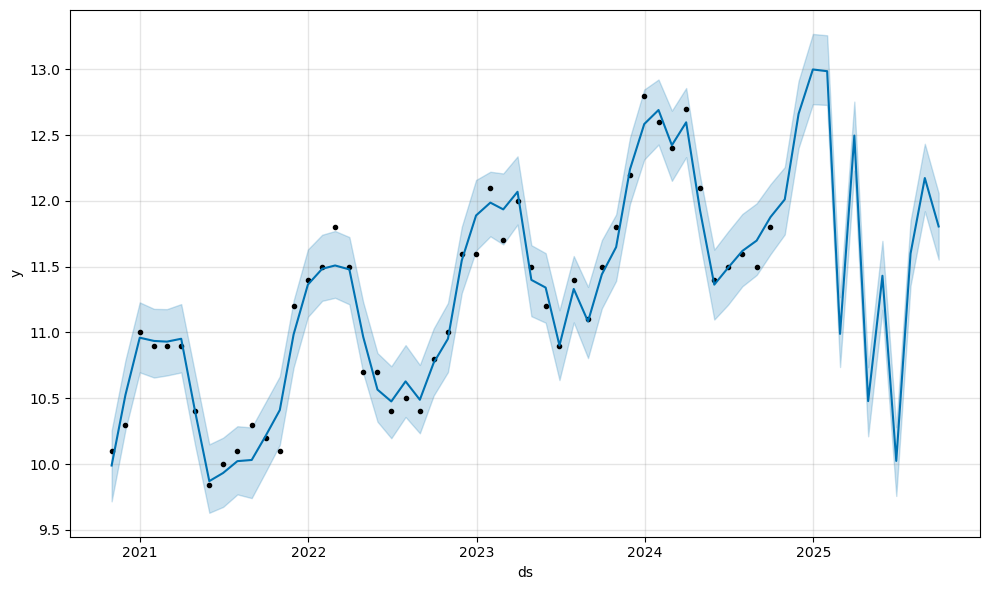

In [6]:
fig1= model.plot(forecast)

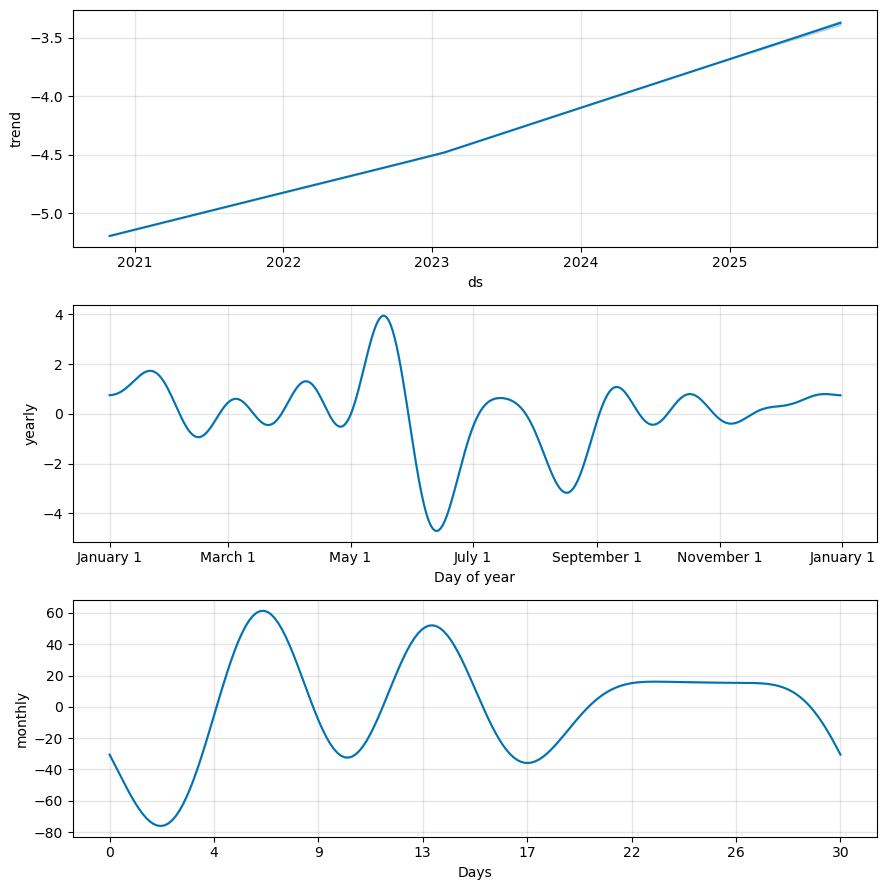

In [7]:
fig2= model.plot_components(forecast,uncertainty=True)
plt.show()

In [58]:
"""def estimate(input_date):
    input_date = pd.to_datetime(input_date)
    forecast_copy = forecast[['ds', 'yhat']].copy()
    forecast_copy['ds_ordinal'] = forecast_copy['ds'].map(pd.Timestamp.toordinal)
    X = forecast_copy['ds_ordinal'].values.reshape(-1, 1)
    y = forecast_copy['yhat'].values
    #reg = LinearRegression().fit(X, y)

    if isinstance(input_date, pd.Timestamp):
        input_date = [input_date]
    input_ordinal = [d.toordinal() for d in input_date]
    predictions= reg.predict(np.array(input_ordinal).reshape(-1,1))
    return [float(round(p,2)) for p in predictions]    
    """

In [60]:
def estimate(input_date):
    # Convert input to pandas datetime if it's not already
    input_date = pd.to_datetime(input_date)
    
    # Handle both single date and list of dates
    if not isinstance(input_date, list):
        input_dates = [input_date]
    else:
        input_dates = input_date
        
    # Create a dataframe with the input dates
    prediction_df = pd.DataFrame({'ds': input_dates})
    
    # Use the Prophet model to make predictions
    predictions = model.predict(prediction_df)
    
    # Extract and round the predicted values
    results = [float(round(p, 2)) for p in predictions['yhat'].values]
    
    # Return a single value if only one date was provided
    if len(results) == 1 and not isinstance(input_date, list):
        return results[0]
    else:
        return results

In [9]:
"""date= input()
estimate(date)"""

'date= input()\nestimate(date)'

In [62]:
#injectionn date
def injection_date():
    date_list =[]
    while True:
        date=input("Enter injection Date or type 'done' to finish")
        if date.lower()=="done":
            break
        date_list.append(date)
    return date_list

In [70]:
#withdrawal date
def withdrawal_date():
    date_list =[]
    while True:
        date=input("Enter withdrawal Date or type 'done' to finish")
        if date.lower()=="done":
            break
        date_list.append(date)
    return date_list

In [78]:
#injection date price calculation
def injection_price(dates):
    Price_date = []
    for d in dates:
        Price_date.append(estimate(d))
    return Price_date
print(injection_price(['2024-01-15', '2025-04-01',"2024-10-15"]))
# Should print something like: [10.52, 10.84]

#injection_price(injection_date())

[17.53, 13.12, 36.77]


In [76]:
#withdrawal date price calculation
def withdrawal_price(dates):
    Price_date = []
    for d in dates:
        Price_date.append(estimate(d))
    return Price_date
withdrawal_price(["2024-10-15"])

[36.77]

In [98]:
def contract_value():
    volume=0
    injection_rate= float(input("injection_rate per MMBtu : "))
    withdrawal_rate=float(input("withdrawal_rate per MMBtu : "))
    Storage_costs= float(input("Storage_costs : " ))
    max_volume_capacity = float(input("max_volume_capacity : "))

    inject_date=injection_date()
    withdr_date=withdrawal_date()
    inject_price=injection_price(inject_date)
    #print(inject_price)
    withdr_price=withdrawal_price(withdr_date)
    #print(withdr_price)
    start_date= min(inject_date)
    end_date= max(withdr_date)
    diff = relativedelta(pd.to_datetime(end_date),pd.to_datetime(start_date))
    months = diff.years * 12 + diff.months
    rent = months* Storage_costs
    #print(rent)
    volume_inject = (len(inject_date))*injection_rate
    volume_withdr = (len(withdr_date))*withdrawal_rate
    volume = min(volume_inject,volume_withdr,max_volume_capacity)
    #print(volume)
    avg_sell= sum(Price for Price in withdr_price)/ len(withdr_price)
    #print(avg_sell)
    avg_buy= sum(price for price in inject_price) / len(inject_price)
   # print(avg_buy)
    value = (((avg_sell-avg_buy)*volume) - rent)
    return value


In [96]:
contract_value()

injection_rate per MMBtu :  1000000
withdrawal_rate per MMBtu :  1000000
Storage_costs :  100000
max_volume_capacity :  4000000
Enter injection Date or type 'done' to finish 2025-06-30
Enter injection Date or type 'done' to finish done
Enter withdrawal Date or type 'done' to finish 2025-08-31
Enter withdrawal Date or type 'done' to finish done


(1950000.0000000005, 2)